In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import h5py
from tqdm import tqdm
import scipy.io as sio
from scipy import stats
from importlib import reload
from matplotlib import pyplot as plt
import sys
sys.path.append('/home/jma819/post_cmfe_analysis')
#sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/post_cmfe_analysis')
import python_utils_jjm as utils_jjm
import dlc_utils
import caiman
from sklearn.preprocessing import MinMaxScaler
import scipy.spatial.distance as dist
import itertools
import math
import warnings
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import av
from multiprocessing import Pool
import functools
plt.rcParams['animation.ffmpeg_path']='/home/jma819/.conda/envs/caiman/bin/ffmpeg'
warnings.filterwarnings(action='once')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:35:16.986556. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [16]:
reload(utils_jjm)
reload(dlc_utils)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:35:36.824571. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


<module 'dlc_utils' from '/home/jma819/post_cmfe_analysis/dlc_utils.py'>

In [17]:
#cnmfe_file_key = pd.read_csv('/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/cnmfe_key.csv')
cnmfe_file_key = pd.read_csv('/projects/p30771/dlc_analysis/openfield_dlc_output/cnmfe_key.csv')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:35:40.807805. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [18]:
#cnmfe_base_dir = '/Volumes/My_Passport/cnmfe_analysis_files/batch_output_files/'
cnmfe_base_dir = '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/'
# '27-Feb_17_33_59_out.mat' '28-Feb_16_21_21_out.mat' '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat' throwing error
wt_CNMFE_files = ['29-Jan_12_35_06_out.mat','30-Mar_20_39_05_out.mat', '30-Mar_20_45_16_out.mat', '22-Mar_22_52_02_out.mat',
                 '28-Feb_16_10_05_out.mat', '27-Feb_17_32_15_out.mat', '25-Mar_13_27_27_out.mat',
                 '27-Feb_17_33_59_out.mat', '28-Feb_16_21_21_out.mat', '25-Mar_14_22_02_out.mat', '25-Mar_14_22_44_out.mat', 
                  '26-Mar_18_33_55_out.mat', '27-Mar_00_26_12_out.mat', '27-Mar_00_48_46_out.mat']

ko_CNMFE_files = ['30-Jan_16_54_31_out.mat','30-Jan_14_00_19_out.mat','31-Jan_01_43_49_out.mat','31-Jan_00_12_24_out.mat','31-Mar_13_28_15_out.mat', '29-Mar_21_42_20_out.mat', '13-Apr_17_57_40_out.mat', '29-Mar_14_27_55_out.mat', '13-Apr_16_01_20_out.mat',
                 '13-Apr_16_11_27_out.mat', '29-Mar_13_39_44_out.mat']

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:35:41.858341. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [19]:
#tracking_files = ['/Volumes/My_Passport/dlc_analysis/behavcamvideos/open_field_miniscope/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key) for fname in wt_CNMFE_files] 
tracking_files = ['/projects/b1118/behaviorvideos/'+utils_jjm.find_behavior_tracking(fname, cnmfe_file_key, 'unsmoothed_02212021') for fname in wt_CNMFE_files] 

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:35:47.308745. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [20]:
CNMFE_dir_paths_list = [str(cnmfe_base_dir+fname) for fname in wt_CNMFE_files]
#CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:35:47.980118. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [7]:
len(CNMFE_dir_paths_list)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:12:27.163490. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


14

In [8]:
CNMFE_dir_paths_list

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:12:27.171258. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_39_05_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_45_16_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/22-Mar_22_52_02_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_10_05_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/27-Feb_17_32_15_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/25-Mar_13_27_27_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/27-Feb_17_33_59_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_21_21_out.mat',
 '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/25-Mar_14_22_02_

In [9]:
tracking_files

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:12:27.178021. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


['/projects/b1118/behaviorvideos/GRIN039_H12_M26_S54/GRIN039_H12_M26_S54_dlc_tracking_foranalysis_unsmoothed_02212021.csv',
 '/projects/b1118/behaviorvideos/GRIN013_H13_M33_S54/GRIN013_H13_M33_S54_dlc_tracking_foranalysis_unsmoothed_02212021.csv',
 '/projects/b1118/behaviorvideos/GRIN027_H13_M29_S44/GRIN027_H13_M29_S44_dlc_tracking_foranalysis_unsmoothed_02212021.csv',
 '/projects/b1118/behaviorvideos/GRIN033_H14_M34_S32/GRIN033_H14_M34_S32_dlc_tracking_foranalysis_unsmoothed_02212021.csv',
 '/projects/b1118/behaviorvideos/GRIN033_H13_M42_S33/GRIN033_H13_M42_S33_dlc_tracking_foranalysis_unsmoothed_02212021.csv',
 '/projects/b1118/behaviorvideos/GRIN032_H17_M30_S22/GRIN032_H17_M30_S22_dlc_tracking_foranalysis_unsmoothed_02212021.csv',
 '/projects/b1118/behaviorvideos/GRIN034_H15_M28_S2/GRIN034_H15_M28_S2_dlc_tracking_foranalysis_unsmoothed_02212021.csv',
 '/projects/b1118/behaviorvideos/GRIN026_H16_M35_S34/GRIN026_H16_M35_S34_dlc_tracking_foranalysis_unsmoothed_02212021.csv',
 '/project

In [13]:
CNMFE_file = '/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat'
tracking_file = '/projects/b1118/behaviorvideos/GRIN039_H12_M26_S54/GRIN039_H12_M26_S54_dlc_tracking_foranalysis_unsmoothed_02212021.csv'
cell_fluorescence = sio.loadmat(CNMFE_file)
C_timedelta = utils_jjm.create_fluorescence_time_delta(cell_fluorescence['C'])
C_normalized = C_timedelta.apply(utils_jjm.normalize).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
tracking_file.split('/')[-2]




/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:30:07.191987. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


'GRIN039_H12_M26_S54'

In [21]:
#C_normalized.to_hdf('/projects/b1118/miniscope/analysis/compiled_data/C_normalized/C_normalized_timedelta_wt.h5', key=tracking_file.split('/')[-2], mode='a')

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:35:57.266100. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [22]:
grouped_raw_data = {}
success = []
failed = []
for CNMFE_file, tracking_file in zip(CNMFE_dir_paths_list[0:6], tracking_files[0:6]):
    print(CNMFE_file)
    print(tracking_file)
    try:
        # load cell fluorescence 
        cell_fluorescence = sio.loadmat(CNMFE_file)
        C_timedelta = utils_jjm.create_fluorescence_time_delta(cell_fluorescence['C'])
        C_normalized = C_timedelta.apply(utils_jjm.normalize).set_index(pd.to_timedelta(np.linspace(0, (len(C_timedelta)-1)*(1/20), len(C_timedelta)), unit='s'), drop=True)
        # create tracking time deltas
        velocity_data = pd.read_csv(tracking_file)
        velocity_data.drop(['Unnamed: 0', 'index'], axis=1, inplace=True)
        velocity_data_td = velocity_data.set_index(pd.to_timedelta(np.linspace(velocity_data['sysClock'].iloc[0], 
               velocity_data['sysClock'].iloc[-1]/1000,
               len(velocity_data)), unit='s'), drop=True) 
        #load spatial components by session
        com_df, spatial_components = utils_jjm.return_spatial_info(CNMFE_file, 0.6)
        cell_contours, for_dims = utils_jjm.create_contour_layouts(spatial_components)
        
        #store results 
        grouped_raw_data[tracking_file.split('/')[-2]] = {'C': C_timedelta, 'C_normalized': C_normalized, 'velocity_data' : velocity_data_td, 
                                                          'com' : com_df, 'spatial_components' : spatial_components, 
                                                          'cell_contours': cell_contours, 'for_dims' : for_dims}
        success.append((tracking_file.split('/')[-2], CNMFE_file.split('/')[-1]))
    except FileNotFoundError:
        failed.append(tracking_file)
    except OSError:
        failed.append(tracking_file)

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:36:12.462539. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/29-Jan_12_35_06_out.mat
/projects/b1118/behaviorvideos/GRIN039_H12_M26_S54/GRIN039_H12_M26_S54_dlc_tracking_foranalysis_unsmoothed_02212021.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_39_05_out.mat
/projects/b1118/behaviorvideos/GRIN013_H13_M33_S54/GRIN013_H13_M33_S54_dlc_tracking_foranalysis_unsmoothed_02212021.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/30-Mar_20_45_16_out.mat
/projects/b1118/behaviorvideos/GRIN027_H13_M29_S44/GRIN027_H13_M29_S44_dlc_tracking_foranalysis_unsmoothed_02212021.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/22-Mar_22_52_02_out.mat
/projects/b1118/behaviorvideos/GRIN033_H14_M34_S32/GRIN033_H14_M34_S32_dlc_tracking_foranalysis_unsmoothed_02212021.csv
/projects/p30771/MATLAB/CNMF_E_jjm/quest_MATLAB_cnmfe/batch_output_files/28-Feb_16_10_05_out.mat
/projects/b1118/behaviorvideos/GRIN

## triggered averaging 

In [23]:
success

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:36:36.496419. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


[('GRIN039_H12_M26_S54', '29-Jan_12_35_06_out.mat'),
 ('GRIN013_H13_M33_S54', '30-Mar_20_39_05_out.mat'),
 ('GRIN027_H13_M29_S44', '30-Mar_20_45_16_out.mat'),
 ('GRIN033_H14_M34_S32', '22-Mar_22_52_02_out.mat'),
 ('GRIN033_H13_M42_S33', '28-Feb_16_10_05_out.mat'),
 ('GRIN032_H17_M30_S22', '27-Feb_17_32_15_out.mat')]

In [24]:
## combine dfs for each session to bin velocity values across dfs
#downsample
new_sampling_interval = .2
V_df = pd.concat([grouped_raw_data[session]['velocity_data'].resample(str(new_sampling_interval)+'S').max() 
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))
all_sessions_v_bins = pd.cut(V_df['tail_base'], bins=10)

V_df['velocity_bins'] = all_sessions_v_bins

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:37:27.513102. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [25]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    # get indicies of small cells 
    cells_to_drop = np.array([int(cell) for cell in range(1, len(grouped_raw_data[session]['cell_contours'])+1) if 
                              len(np.array(np.where(grouped_raw_data[session]['for_dims'][cell]>0.6)[0]))<100])
    C_traces_filtered = grouped_raw_data[session]['C_normalized'].drop(cells_to_drop, axis=1)
    filtered_for_analysis[session] = C_traces_filtered.drop('msCamFrame', axis=1)
# sets sampling interval to 5Hz 
C_norm_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(filtered_for_analysis.keys())], axis=1, keys=list(filtered_for_analysis.keys()))
# after downsampling convert back to regular index
C_norm_df_reindexed = pd.concat([C_norm_df[session].reset_index(drop=True)
                  for session in list(set(C_norm_df.columns.get_level_values(0)))], axis=1, keys=list(set(C_norm_df.columns.get_level_values(0))))

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:37:29.404643. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [29]:
#bin by activity threshold, using original samples here
#inputs: (body_part, resting_time_threshold, active_time_threshold, crossing_threshold, resting_threshold, activity_threshold)
binned_velocity_df = pd.DataFrame([dlc_utils.bin_by_activity_threshold_2(grouped_raw_data[session]['velocity_data']['tail_base'], 10, 10, 2, 5, 1)
                                for session in list(grouped_raw_data.keys())], index=list(grouped_raw_data.keys()))
binned_velocity_df = binned_velocity_df.transpose()

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:38:17.322970. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:40:02.538883. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


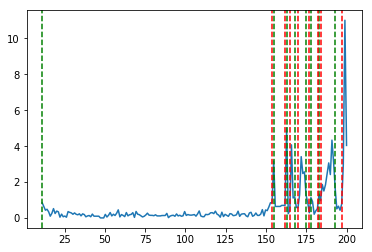

In [33]:
#show examples of "resting periods" for subset of trace 
velocity_trace = grouped_raw_data[session]['velocity_data']['tail_base'].values[0:200]
resting_samples = velocity_trace<=1
resting_boundaries = dlc_utils.get_resting_period_boundaries(resting_samples)

#plot resting periods
fig, ax = plt.subplots(1)
ax.plot(np.linspace(0, len(velocity_trace), len(velocity_trace)) , velocity_trace)
for bound in resting_boundaries:
    ax.axvline(x=bound[0], linestyle='--', color='g')
for bound in resting_boundaries:
    ax.axvline(x=bound[1], linestyle='--', color='r')
plt.show()


In [43]:
# get resting periods for all sessions, here threshold is 1
resting_boundaries_by_session = {session:dlc_utils.get_resting_period_boundaries(grouped_raw_data[session]['velocity_data']['tail_base'].values<=1) for
                                session in list(grouped_raw_data.keys())}

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 15:45:51.711608. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
##get threshold crossing indicies from binned velocity df
crossing_indicies_from_velocity_df = {}
for session in list(grouped_raw_data.keys()):
    # gets indicies where animal crosses a velocity threshold
    # these indicies are from resampled df, need to find aligned section in resampled df 
    crossing_indicies = [sample for sample in utils_jjm.select_trigger_regions(binned_velocity_df[session], 0.5, 0.5, 20) if sample<len(grouped_raw_data[session]['C_normalized'])]
    # exclude regions with large nan contributions
    nan_values_to_exclude = [crossing_idx for crossing_idx in crossing_indicies if grouped_raw_data[session]['velocity_data'].iloc[crossing_idx:crossing_idx+10]['tail_base'].isna().sum()>1]        
    crossing_indicies_from_velocity_df[session] = [idx for idx in crossing_indicies if idx not in nan_values_to_exclude]
#get movement offset points
movement_offset_points_bysession = {session : dlc_utils.get_movement_offset_points(crossing_indicies_from_velocity_df[session], 1, grouped_raw_data[session]['velocity_data']['tail_base'])
                                                                        for session in crossing_indicies_from_velocity_df.keys()}

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 16:01:28.431134. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [68]:
#with bounds of movement region pull out these regions 
moving_periods_by_session = {}
for session in crossing_indicies_from_velocity_df.keys():
    moving_indicies = [(crossing_indicies_from_velocity_df[session][start_idx], movement_offset_points_bysession[session][end_idx]) for start_idx, 
                   end_idx in zip(range(len(crossing_indicies_from_velocity_df[session])), range(len(movement_offset_points_bysession[session]))) if
                  crossing_indicies_from_velocity_df[session][start_idx]>movement_offset_points_bysession[session][end_idx-1] or start_idx==0]
    moving_periods_in_session = pd.DataFrame({k:v for k,v in zip([(start_idx, end_idx) for start_idx, end_idx in zip(crossing_indicies_from_velocity_df[session], movement_offset_points_bysession[session])], 
                                                             [grouped_raw_data[session]['velocity_data']['tail_base'].iloc[moving_indicies[period][0]:moving_indicies[period][1]].reset_index(drop=True)
                             for period in range(len(moving_indicies))])})
    moving_periods_by_session[session]=moving_periods_in_session

/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 16:01:32.515971. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [70]:
session = session
#session_df = z_scored_regions_by_session[session]
sample_crossing_indicies = crossing_indicies_from_velocity_df[session]
print('session:', session)
print('threshold crossing indicies (from velocity data):' , sample_crossing_indicies)
print('cell indicies:' , list(set(C_norm_df[session].columns)))


session: GRIN032_H17_M30_S22
threshold crossing indicies (from velocity data): [236, 1186, 1423, 3638, 3710, 3766, 3938, 6688, 6754, 6781, 6888, 6916, 18629, 18923, 19032, 19105, 19200]
cell indicies: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 86, 89, 90, 91, 92, 93, 94, 96, 98, 100, 101, 103, 104, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144]


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 16:01:57.521160. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [71]:
idx = 1
index = sample_crossing_indicies[idx]
print('sample crossing index: ', index)
frame_threshold_crossing = grouped_raw_data[session]['velocity_data'].iloc[index]['behavCam_frames']
behavCam_video = int(frame_threshold_crossing/1000)+1
frames_within_video =frame_threshold_crossing%1000
print('event occurs at ', frame_threshold_crossing, ' total frames')
print('behavCam ', behavCam_video, ' at ', frames_within_video, ' frames')

sample crossing index:  1186
event occurs at  1718.0  total frames
behavCam  2  at  718.0  frames


/home/jma819/.conda/envs/caiman/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2021-03-01 16:01:58.468298. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [ ]:
#ani

In [ ]:
#for comparison, pull out the fluorescence during period preceeding movement event
def pull_out_fluorescence_from_velocity_bounds(velocity_trace_boundaries, velocity_trace, fluorescence_trace):
    """velocity trace and fluorescence trace are indexed by timedeltas
        e.g velocity_trace=grouped_raw_data[session]['velocity_data']
        fluorescence_trace=C_norm_df[session]
    """
    #convert indicies to timedelta and exclude those outside period of fluorescence recording
    movement_boundaries_time_delta = [(velocity_trace.iloc[movement_bounds[0]].name, velocity_trace.iloc[movement_bounds[1]].name) for movement_bounds in velocity_trace_boundaries if velocity_trace.iloc[movement_bounds[0]].name<C_norm_df[session].iloc[-1].name]
    #parallel this 
    movement_boundaries_Cdf = [(dlc_utils.nearest(fluorescence_trace.index, movement_bound[0]), dlc_utils.nearest(fluorescence_trace.index, movement_bound[1])) for movement_bound in tqdm(movement_boundaries_time_delta)]
    #
    fluorescence_during_periods = pd.concat([fluorescence_trace.loc[movement_bound_Cdf[0]:movement_bound_Cdf[1]].reset_index(drop=True) for movement_bound_Cdf in movement_boundaries_Cdf], axis=0, keys=movement_boundaries_Cdf)
    return(fluorescence_during_periods)

In [ ]:
#for each session, pull out the fluorescence during a movement event
def return_movement_and_rest_for_session(moving_periods_by_session, resting_boundaries_by_session, grouped_raw_data, 
                                         C_norm_df, resting_period_threshold, session):
    
    movement_boundaries = list(moving_periods_by_session[session].columns)
    pre_movement_boundaries = [(movement_bound[0]-80, movement_bound[0]) for movement_bound in movement_boundaries]

    #filter out short "resting" periods 
    resting_boundaries_long = [(boundary[0], boundary[1]) for boundary in resting_boundaries_by_session[session] if (boundary[1]-boundary[0]>resting_period_threshold)]
    
    if len(movement_boundaries)>0:
        movement_fluorescence = pull_out_fluorescence_from_velocity_bounds(movement_boundaries, grouped_raw_data[session]['velocity_data'], C_norm_df[session])
        pre_movement_fluorescence = pull_out_fluorescence_from_velocity_bounds(pre_movement_boundaries, grouped_raw_data[session]['velocity_data'], C_norm_df[session])
    else:
        movement_fluorescence = []
        pre_movement_fluorescence = []
    
    if len(resting_boundaries_long)>0:
        resting_fluorescence = pull_out_fluorescence_from_velocity_bounds(resting_boundaries_long[:-1], grouped_raw_data[session]['velocity_data'], C_norm_df[session])
    else:
        resting_fluorescence = []
    
    return({'movement_fluorescence':movement_fluorescence, 'pre_movement_fluorescence':pre_movement_fluorescence, 'resting_fluorescence':resting_fluorescence})

In [ ]:
session

In [ ]:
periods_by_session = {session:return_movement_and_rest_for_session(moving_periods_by_session, resting_boundaries_by_session, grouped_raw_data, C_norm_df, 90, session)
 for session in list(moving_periods_by_session.keys())}

In [ ]:
#parallel implementation, not currently working, kernel dies
#p=Pool(7)
#outputs_by_session = p.map(functools.partial(return_movement_and_rest_for_session, moving_periods_by_session, 
#                        resting_boundaries_by_session, grouped_raw_data, C_norm_df, 90), list(moving_periods_by_session.keys())[:2])
#p.close

In [ ]:
#movement_fluorescence

In [ ]:
#z score movement regions by resing regions 

In [ ]:
#list(periods_by_session.keys())

In [ ]:
def z_score_movement_by_rest(session_binnded):
    #values from rest to z score
    resting_fluorescence_mean = session_binnded['resting_fluorescence'].mean()
    resting_fluorescence_std = session_binnded['resting_fluorescence'].std()
    #indicies of movment onset and offset
    movement_onsets = list(session_binnded['movement_fluorescence'].index.levels[0])
    movement_offsets = list(session_binnded['movement_fluorescence'].index.levels[1])
    rest_onsets = list(session_binnded['resting_fluorescence'].index.levels[0])
    rest_offsets = list(session_binnded['resting_fluorescence'].index.levels[1])
    #use the resting mean and standard deviation values to z score 
    #z score movement regions
    z_scored_movement_regions = pd.concat([(session_binnded['movement_fluorescence'].loc[movement_onset].loc[movement_offset]-resting_fluorescence_mean)/resting_fluorescence_std
                                       for movement_onset, movement_offset in zip(movement_onsets, movement_offsets)], keys=list(zip(movement_onsets, movement_offsets)))
    #z score rest regions
    z_scored_rest_regions = pd.concat([(session_binnded['resting_fluorescence'].loc[rest_onset].loc[rest_offset]-resting_fluorescence_mean)/resting_fluorescence_std
                                       for rest_onset, rest_offset in zip(rest_onsets, rest_offsets)], keys=list(zip(rest_onsets, rest_offsets)))
    return({'z_scored_movement_regions':z_scored_movement_regions , 'z_scored_rest_regions': z_scored_rest_regions})

In [ ]:
def calculate_event_probability(baseline_regions, to_compare, z_score_event_threshold):
    #event probability by cell, comparison regions
    cell_event_probability_comparison = pd.DataFrame({cell:np.count_nonzero(to_compare[cell].values>z_score_event_threshold)/len(to_compare) 
                                                for cell in list(to_compare.columns)}, index=['event probability'])
    #event probability by cell, baseline regions 
    cell_event_probability_baseline = pd.DataFrame({cell:np.count_nonzero(baseline_regions[cell].values>z_score_event_threshold)/len(baseline_regions) 
                                            for cell in list(baseline_regions.columns)}, index=['event probability'])
    return(cell_event_probability_comparison, cell_event_probability_baseline)

In [ ]:
##everything below here generally need to be written to iterate over sessions
##1) calculate "event probabilities"
##2) create videos 
##   if adding behavCam to video, will need to select subset of frames from behavCam

In [ ]:
#list(periods_by_session.keys())

In [ ]:
# loop over sessions to calculate event probabilities
for session in list(periods_by_session.keys()):
    by_session = z_score_movement_by_rest(periods_by_session[session])
    event_p_movement, event_p_rest = calculate_event_probability(by_session['z_scored_rest_regions'], by_session['z_scored_movement_regions'], 2)


In [ ]:
## display data from a single session/bin by velocity 
session = 'GRIN039_H12_M26_S54'
session

In [ ]:
##iterate over sessions to find event probabilities

In [ ]:

z_scored_events_by_session = {session:z_score_movement_by_rest(periods_by_session[session]) for session in list(periods_by_session.keys())}

In [ ]:
z_scored_events_by_session.keys()

In [ ]:
# use V_df, resampled df to same interval as c_df, get max velocity bin during movement regions and group events that way 
event_p_by_session = {}
for session in z_scored_events_by_session.keys():
    by_session=z_scored_events_by_session[session]
    max_v_bins_in_session = {}
    for event in range(len(by_session['z_scored_movement_regions'].index.levels[0])):
    #find maximum velocity bin for each movement region
        max_v_bins_in_session[by_session['z_scored_movement_regions'].index.levels[0][event]]=V_df.loc[session].loc[by_session['z_scored_movement_regions'].index.levels[0][event]:by_session['z_scored_movement_regions'].index.levels[1][event]]['velocity_bins'].max()
    # determine the distribution of unique velocity bins in a session
    unique_max_v_bins_in_session = list(set(max_v_bins_in_session.values()))
    # group events by max v bin 
    sorted_by_v_bin = {}
    for v_bin in unique_max_v_bins_in_session:
        events_with_v_bin = []
        for event in list(max_v_bins_in_session.keys()):
            if max_v_bins_in_session[event]==v_bin:
                  events_with_v_bin.append(event)
        sorted_by_v_bin[v_bin.left]=events_with_v_bin
    event_p_by_vbin = {}
    for v_bin in list(sorted_by_v_bin.keys()):
        event_p_by_vbin[v_bin] = calculate_event_probability(by_session['z_scored_rest_regions'], by_session['z_scored_movement_regions'].loc[sorted_by_v_bin[v_bin]], 2)[0]
        event_p_by_vbin['rest'] = calculate_event_probability(by_session['z_scored_rest_regions'], by_session['z_scored_movement_regions'].loc[sorted_by_v_bin[v_bin]], 2)[1]

    event_p_by_session[session]=pd.concat(event_p_by_vbin, keys=list(event_p_by_vbin.keys()))
   
    

In [ ]:
event_p_by_session_df = pd.concat(list(event_p_by_session.values()), keys=event_p_by_session.keys(), axis=1)

In [ ]:
#summarize over sessions or over cells
event_p_by_session_df.mean(axis=1, level=0)

In [ ]:
plt.plot(event_p_by_session_df.mean(axis=1))

In [ ]:
##
bin_=list(event_p_by_vbin.keys())[2]
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.scatter(list(event_p_by_vbin['rest'].columns), event_p_by_vbin['rest'].loc['event probability'])
ax1.set_ylim(-0.03, event_p_by_vbin[bin_].loc['event probability'].max()+0.1)
ax2.scatter(list(event_p_by_vbin[bin_].columns), event_p_by_vbin[bin_].loc['event probability'])
ax2.set_ylim(-0.03, event_p_by_vbin[bin_].loc['event probability'].max()+0.1)
plt.show()

In [ ]:
## get fold change over rest 
fold_change = event_p_by_vbin[bin_].loc['event probability']/event_p_by_vbin['rest'].loc['event probability']
plt.scatter(list(event_p_by_vbin[bin_].columns), fold_change)
plt.show()
print("average fold change over rest:", fold_change.mean())

In [ ]:
## bin fold change for different velocities 

In [ ]:
## save example cell response videos for events

In [ ]:
session

In [ ]:
# get bounds_of_display_region from velocity threshold crossing indicies 
velocity_bound_range_to_display = 200
bounds_of_display_region = [(onset-velocity_bound_range_to_display, onset+velocity_bound_range_to_display) for onset in list(moving_periods_by_session[session].columns.levels[0])] 

In [ ]:
# select movement regions from fluorescence data
movement_regions_for_display = pull_out_fluorescence_from_velocity_bounds(bounds_of_display_region, grouped_raw_data[session]['velocity_data'], C_norm_df[session])

In [ ]:
#bounds_of_display_region

In [ ]:
#move corresponding behaviorCam videos to quest
for session in [session for session in list(periods_by_session.keys()) if len(moving_periods_by_session[session])>0]:
    #get file paths for behav cam videos and output a text file to input to globus cli for batch transfer
    behavCam_locs = []
    for event in [(onset-velocity_bound_range_to_display, onset+velocity_bound_range_to_display) for onset in list(moving_periods_by_session[session].columns.levels[0])] :
        behavCam_locs.append(dlc_utils.get_behavCam_avi_index(event[0]))
    behav_cam_indicies = list(set([loc[0] for loc in behavCam_locs]))
    behav_cam_paths = np.array(['/rdss/jma819/fsmresfiles/Projects/JJM/MiniscopeMovies/dlc_analysis/'+session+'/behavCam'+str(bCam_idx).zfill(2)+'DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4'+' /projects/b1118/behaviorvideos/'+session+'/behavCam'+str(bCam_idx).zfill(2)+'DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4' for bCam_idx in behav_cam_indicies])
    #text file for globus needs to be in format 
    # source_path dest_path 
    np.savetxt('/projects/b1118/miniscope/analysis/event_videos/'+session+'_tomove.txt', behav_cam_paths, delimiter=';', fmt='%s')

In [ ]:
# zscore movement regions by resting data
movement_regions_z_scored_for_display = z_score_movement_by_rest({'movement_fluorescence':movement_regions_for_display, 'resting_fluorescence': periods_by_session[session]['resting_fluorescence']})

In [ ]:
#list(set(z_scored_regions_by_session[session].columns.get_level_values(1)))
def create_demixed_movie_from_traces(cells, cell_contours, )

In [ ]:
session

In [ ]:
event_idx = 0 
cell = 37

for event_idx in tqdm(range(len(list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])))):
    frame_range = (0, len(movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]]))
    ## plot responses of all cells during movement events
    all_cell_contours = grouped_raw_data[session]['spatial_components'][:, :]

    cells_reshaped = np.empty((np.shape(all_cell_contours)[1], frame_range[1], d2, d1))
    for cell in tqdm(list(movement_regions_z_scored_for_display['z_scored_movement_regions'].columns)):
        # "spatial components", or "A" as dense matrix, cells are 1 indexed, spatial array is 0 indexed  
        A_reshaped = np.reshape(all_cell_contours[:, cell-1], (d2, d1))
        #cell_frames = []
        #for frame in range(frame_range[0], frame_range[1]):
        #cell_frames.append(np.array([np.dot(A_reshaped, item) for item in [255, 128, 0, z_scored_regions_by_session[session][sample][cell][frame]]]))
        cells_reshaped[cell-1] = np.array([np.dot(A_reshaped, 
                                              movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]][cell][frame]) for frame in range(frame_range[0], frame_range[1])])
    cells_recombined = np.sum(cells_reshaped, axis=0)

    for cell in list(movement_regions_z_scored_for_display['z_scored_movement_regions'].columns):
        ## plot cell contour 
        # "spatial components", or "A" as dense matrix, cells are 1 indexed, spatial array is 0 indexed  
        cell_contour = grouped_raw_data[session]['spatial_components'][:, cell-1]
        # create movie
        frame_range = [0, len(movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]][cell])]

        d1 = 752
        d2 = 480
        A_cell_reshaped = np.reshape(cell_contour, (d2, d1))
        C_cell_trace = movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]][cell].values
        response_movie = np.array([np.dot(A_cell_reshaped, C_cell_trace[frame]) for frame in range(frame_range[0], frame_range[1])])

        ## plot individual cell activity 
        # np array with shape (frames, height, width, channels)
        video = cells_recombined
        video_2 = response_movie

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
        im = ax1.imshow(video[0,:,:], cmap='gray', vmin=0, vmax=255)
        im2 = ax2.imshow(video_2[0,:,:], cmap='gray', vmin=0, vmax=255)
        ax3.plot(movement_regions_for_display.loc[list(movement_regions_for_display.index.levels[0])[event_idx]].loc[list(movement_regions_for_display.index.levels[1])[event_idx]][cell])
        ax4.plot(np.linspace(0, velocity_bound_range_to_display*2, velocity_bound_range_to_display*2), 
             grouped_raw_data[session]['velocity_data']['tail_base'][list(moving_periods_by_session[session].columns.levels[0])[event_idx]-velocity_bound_range_to_display:list(moving_periods_by_session[session].columns.levels[0])[event_idx]+velocity_bound_range_to_display])
        ax4.axvline(x=velocity_bound_range_to_display, linestyle='--', color='g')

        plt.close() # this is required to not display the generated image

        def init():
            fig.suptitle("cell "+str(cell)+" event "+str(event_idx)+" frame: "+str(0))
            im.set_data(video[0,:,:])
            im2.set_data(video_2[0,:,:])

        def animate(i):
            fig.suptitle("cell "+str(cell)+" event "+str(event_idx)+" frame: "+str(i))
            im.set_data(video[i,:,:])
            im2.set_data(video_2[i,:,:])
            return (im, im2)

        anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)

        rc('animation', html='jshtml')
        mywriter = animation.FFMpegWriter(fps=5)
        anim.save('/projects/b1118/miniscope/analysis/event_videos/'+session+'_event_'+str(event_idx)+'_cell_'+str(cell)+'.mp4',
                 writer=mywriter)
    print('saved: '+' /projects/b1118/miniscope/analysis/event_videos/'+session+' movies for '+str(event_idx)+' events')

In [ ]:
event_idx = 0 
cell = 37
frame_range = (0, len(movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]]))

## plot responses of all cells during movement events
all_cell_contours = grouped_raw_data[session]['spatial_components'][:, :]

cells_reshaped = np.empty((np.shape(all_cell_contours)[1], frame_range[1], d2, d1))
for cell in tqdm(list(movement_regions_z_scored_for_display['z_scored_movement_regions'].columns)):
    # "spatial components", or "A" as dense matrix, cells are 1 indexed, spatial array is 0 indexed  
    A_reshaped = np.reshape(all_cell_contours[:, cell-1], (d2, d1))
    #cell_frames = []
    #for frame in range(frame_range[0], frame_range[1]):
        #cell_frames.append(np.array([np.dot(A_reshaped, item) for item in [255, 128, 0, z_scored_regions_by_session[session][sample][cell][frame]]]))
    cells_reshaped[cell-1] = np.array([np.dot(A_reshaped, 
                                              movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]][cell][frame]) for frame in range(frame_range[0], frame_range[1])])
cells_recombined = np.sum(cells_reshaped, axis=0)

## plot cell contour 
# "spatial components", or "A" as dense matrix, cells are 1 indexed, spatial array is 0 indexed  
cell_contour = grouped_raw_data[session]['spatial_components'][:, cell-1]
# create movie
frame_range = [0, len(movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]][cell])]

d1 = 752
d2 = 480
A_cell_reshaped = np.reshape(cell_contour, (d2, d1))
C_cell_trace = movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]][cell].values
response_movie = np.array([np.dot(A_cell_reshaped, C_cell_trace[frame]) for frame in range(frame_range[0], frame_range[1])])

#sampling_interval_vdf=g
sampling_interval_vdf = list(grouped_raw_data[session]['velocity_data']['tail_base'].index)[1]-list(grouped_raw_data[session]['velocity_data']['tail_base'].index)[0]
ratio = list(C_norm_df[session].index)[1]/sampling_interval_vdf

## plot individual cell activity 
# np array with shape (frames, height, width, channels)
video = cells_recombined
video_2 = response_movie

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
im = ax1.imshow(video[0,:,:], cmap='gray', vmin=0, vmax=255)
im2 = ax2.imshow(video_2[0,:,:], cmap='gray', vmin=0, vmax=255)
ax3.plot(movement_regions_for_display.loc[list(movement_regions_for_display.index.levels[0])[event_idx]].loc[list(movement_regions_for_display.index.levels[1])[event_idx]][cell])

ax4.plot(np.linspace(0, velocity_bound_range_to_display*2, velocity_bound_range_to_display*2), 
         grouped_raw_data[session]['velocity_data']['tail_base'][list(moving_periods_by_session[session].columns.levels[0])[event_idx]-velocity_bound_range_to_display:list(moving_periods_by_session[session].columns.levels[0])[event_idx]+velocity_bound_range_to_display])
ax4.axvline(x=velocity_bound_range_to_display, linestyle='--', color='g')

plt.close() # this is required to not display the generated image

def init():
    fig.suptitle("frame:"+str(0))
    im.set_data(video[0,:,:])
    im2.set_data(video_2[0,:,:])

def animate(i):
    fig.suptitle("frame:"+str(i))
    im.set_data(video[i,:,:])
    im2.set_data(video_2[i,:,:])
    return (im, im2)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)

rc('animation', html='jshtml')



mywriter = animation.FFMpegWriter(fps=5)

anim.save('/projects/b1118/miniscope/analysis/event_videos/'+session+'_event_'+str(event_idx)+'_cell_'+str(cell)+'.mp4',
         writer=mywriter)
print('saved: '+' /projects/b1118/miniscope/analysis/event_videos/'+session+'_event_'+str(event_idx)+'_cell_'+str(cell)+'.mp4')

In [ ]:
anim

In [ ]:
event_idx = 0
cell = 1
fix, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(movement_regions_for_display.loc[list(movement_regions_for_display.index.levels[0])[event_idx]].loc[list(movement_regions_for_display.index.levels[1])[event_idx]][cell])
ax1.axvline(x=(len(movement_regions_for_display.loc[list(movement_regions_for_display.index.levels[0])[event_idx]].loc[list(movement_regions_for_display.index.levels[1])[event_idx]][cell])/2), linestyle='--', color='r')
ax2.plot(movement_regions_z_scored_for_display['z_scored_movement_regions'].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[0])[event_idx]].loc[list(movement_regions_z_scored_for_display['z_scored_movement_regions'].index.levels[1])[event_idx]][cell])
ax2.axvline(x=(len(movement_regions_for_display.loc[list(movement_regions_for_display.index.levels[0])[event_idx]].loc[list(movement_regions_for_display.index.levels[1])[event_idx]][cell])/2), linestyle='--', color='r')
plt.show()


In [ ]:
## plot individual cell activity 
# np array with shape (frames, height, width, channels)
video = response_movie

fig = plt.figure()
im = plt.imshow(video[0,:,:], cmap='gray', vmin=0, vmax=255)

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:])

def animate(i):
    im.set_data(video[i,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
rc('animation', html='jshtml')

## need ffmpeg on quest
#HTML(anim.to_html5_video())

In [ ]:
##to look at behavior video 

In [ ]:
# load behavior video 
sample_range_in_behavCam_video = (int(grouped_raw_data[session]['velocity_data'].iloc[index-50]['behavCam_frames']%1000),
                                  int(grouped_raw_data[session]['velocity_data'].iloc[index+50]['behavCam_frames']%1000))
video = av.open('/projects/b1118/behaviorvideos/'+session+'/behavCam'+str(behavCam_video)+'DLC_resnet50_Open_Field_v2Jan27shuffle1_150000_labeled.mp4')
total_frames = video.streams.video[0].frames
movie_images = {}
for i, frame in enumerate(video.decode(video=0)):
    img = frame.to_image()  # PIL image
    movie_images[i] = img
    if i%1000==0:
        print("Frame: %d/%d ..." % (i, total_frames))
video.close()
movie_shape = np.shape(movie_images[1])

frame_subset = [movie_images[i] for i in range(sample_range_in_behavCam_video[0], sample_range_in_behavCam_video[1])]

fig, (ax1, ax2) = plt.subplots(1, 2)
im = ax1.imshow(frame_subset[0])
ax2.plot(np.linspace(index-50, index+50, 100), grouped_raw_data[session]['velocity_data']['tail_base'].iloc[index-50:index+50])
ax2.axvline(x=(index), linestyle='--', color='g')
ax2.axvline(x=movement_offset_points_bysession[session][idx], linestyle='--', color='r')
fig.set_size_inches(16, 3)
#ax2.secondary_xaxis(-.2, functions=(lambda x: grouped_raw_data[session]['velocity_data'].iloc[x]['behavCam_frames'], 
#                                    lambda x: grouped_raw_data[session]['velocity_data'].iloc[x]['behavCam_frames']))
#ani = animation.ArtistAnimation(fig, matplotlib_images, interval=50, blit=True, repeat_delay=1000)
#HTML(ani.to_html5_video())
def init():
    ax1.set_title("behavCam: "+str(behavCam_video)+"  frame: "+str(sample_range_in_behavCam_video[0]))
    im.set_data(frame_subset[0])
def animate(i):
    ax1.set_title("behavCam: "+str(behavCam_video)+"  frame: "+str(sample_range_in_behavCam_video[0]+i))
    im.set_data(frame_subset[i])
    #ax2.axvline(x=(index-(50+i)), linestyle='--', color='r')
    return im

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=len(frame_subset), interval=50)
rc('animation', html='jshtml')
#HTML(ani.to_html5_video())

In [ ]:
## how to compare with raw traces? maybe use sample indicies to determine specific avi files, then pull from those (w/direct mount to resfiles?), or automate a globus script? 

In [ ]:
# pause to take input (y/n) to determine if trace is ideal 

In [ ]:
# calculate the peak to rms ratio for each threshold event, each cell, and across all cells and events 

peak_rms = lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence)))

cell = 2
event = 1097

peak_rms_ratio_cell = z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==cell].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio_event = z_scored_regions_by_session['GRIN039_H12_M26_S54'][event].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)
peak_rms_ratio = z_scored_regions_by_session['GRIN039_H12_M26_S54'].apply(lambda cell_fluorescence : np.max(cell_fluorescence)/np.sqrt(np.mean(np.square(cell_fluorescence))), axis=0)

In [ ]:
#histogram of all peak to rms ratios across sample events
plt.hist(peak_rms_ratio, 100)
plt.show()

In [ ]:
z_scored_regions_by_session.max()

In [ ]:
peak_rms_ratio.max()

In [ ]:
# plot average activity of a cell across all movement events 

In [ ]:
# plots the activity of a cell across all movement threshold crossings in a given session
cell = 1
z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==cell].head()

In [ ]:
# plot a few example traces
events_to_plot = [0, 1, 5]
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4)
ax1.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[0]]])
ax2.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[1]]])
ax3.plot(z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[2]]])
ax4.plot(pd.concat([z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[0]]],
                   z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[1]]],
                  z_scored_regions_by_session['GRIN039_H12_M26_S54'].iloc[:, z_scored_regions_by_session['GRIN039_H12_M26_S54'].columns.get_level_values(1)==1][sample_crossing_indicies[events_to_plot[2]]]], axis=1).mean(axis=1))

In [ ]:
#concat by mouse 
concacted_by_mouse = {}
for mouse in [name[0:7] for name in list(set(z_scored_regions_by_session.columns.levels[0]))]:
    dfs_by_mouse = []
    sessions = []
    for session in list(z_scored_regions_by_session.columns.levels[0]):
        if mouse in session:
            if not(z_scored_regions_by_session[session].empty):
                #means = z_scored_regions_by_session[session].mean(axis=1, level=0)
                dfs_by_mouse.append(z_scored_regions_by_session[session])
                sessions.append(session)
    if len(dfs_by_mouse)>0:
        concacted_by_mouse[mouse] = pd.concat(dfs_by_mouse, axis=1, keys=sessions)
combined_by_mouse = pd.concat(list(concacted_by_mouse.values()), axis=1, keys=list(concacted_by_mouse.keys()))

In [ ]:
# maybe should do min, max scaler here
plt.plot(combined_by_mouse.mean(axis=1))

In [ ]:
# create range scaled data to compare across cells
scaler = MinMaxScaler()
activity_scaled = pd.DataFrame(scaler.fit_transform(combined_by_mouse), columns=combined_by_mouse.columns)
activity_scaled_cell_means = activity_scaled.groupby(level=[0,1], axis=1).mean()

In [ ]:
plt.plot(activity_scaled.mean(axis=1))

In [ ]:
combined_by_mouse_timedelta = combined_by_mouse.set_index(pd.to_timedelta(np.linspace(0, (len(combined_by_mouse)-1)*(1/5), len(combined_by_mouse)), unit='s'), drop=True)

In [ ]:
#resampled_for_plotting.head()

In [ ]:
plt.rcParams.update({'font.size': 22})
df_to_plot = resampled_for_plotting
activity_measure = 'spatial_coordination'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
scale_f = 0.0868
mean=df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f
plt.plot(x, df_to_plot.mean(axis=1, level=2)['velocity'].values*scale_f, color='k')
std_error = ((df_to_plot.std(axis=1, level=2)['velocity'])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]))*scale_f
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('velocity cm/sec')
ax.set_xlabel('time (seconds)')
ax.axvline(x=(0), linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('/home/jma819/presentation_files/wt_velocity_spatial_coord_triggered.svg', transparent=True)
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/v_triggered.pdf', transparent=True)
plt.show()

In [ ]:
activity_measure = 'fluorescence'
x = np.linspace(-(len(df_to_plot)/2)*.5, (len(df_to_plot)/2)*.5, len(df_to_plot))
mean = df_to_plot.mean(axis=1, level=2)[activity_measure].values
plt.plot(x, mean, color='k')
std_error = (df_to_plot.std(axis=1, level=2)[activity_measure])/math.sqrt(df_to_plot.mean(axis=1, level=0).shape[1]*1)
plt.fill_between(x, mean-std_error, mean+std_error)
ax = plt.gca()
ax.set_ylabel('dF/F z-score')
ax.set_xlabel('time (seconds)')
ax.axvline(x=0, linestyle='--', color='r')
fig = plt.gcf()
fig.set_size_inches(7, 6)
#fig.draw()
#fig.savefig('.svg')
fig.subplots_adjust(left=0.15)
fig.savefig('/Users/johnmarshall/Documents/Presentations/Feb20201_LabMeeting/wt_fluorescence_triggered.pdf', transparent=True)
plt.show()

## event ISIs 

In [ ]:
filtered_for_analysis = {}
for session in list(grouped_raw_data.keys()):
    filtered_for_analysis[session] = utils_jjm.filter_out_by_size(grouped_raw_data[session]['C_normalized_z_scored'], grouped_raw_data[session]['cell_contours'], 
                                                                  grouped_raw_data[session]['for_dims'], 0.6, 100)
C_df = pd.concat([filtered_for_analysis[session].resample(str(new_sampling_interval)+'S').max()
                  for session in list(grouped_raw_data.keys())], keys=list(grouped_raw_data.keys()))

In [ ]:
C_df = C_df.drop(['msCamFrame'], axis=1)

In [ ]:
ISIs_by_session = []
for session in list(grouped_raw_data.keys()):
    print(session)
    event_indicies, event_times, event_ISIs = utils_jjm.get_ISIs(C_df.loc[session].dropna(axis=1), 20, .1, np.array(C_df.loc[session].dropna(axis=1).columns), 2)
    ISIs_by_session.append(event_ISIs)